# Практическая работа №3

## Импорт библиотек

In [26]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

## 2. Построение графика по функции

C:\Temp\ipykernel_452\3339901187.py:7: RuntimeWarning: invalid value encountered in sqrt
  m = np.sqrt(1-(3/4*np.square(x)))


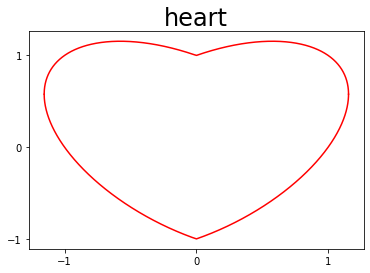

In [1]:
plt.title('heart', fontsize=24)
x = np.arange(-100, 100, 0.0001)
# Разделим функцию на две части
m = np.sqrt(1-(3/4*np.square(x)))
y1 = 0.5*np.abs(x) + m
y2 = 0.5*np.abs(x) - m
# Установить масштаб и интервал координат по оси x и оси y
# Это не будет выглядеть хорошо, если вы не установите его самостоятельно
my_x_ticks = np.arange(-1, 2)
my_y_ticks = np.arange(-1, 2)
plt.plot(x, y1, color='r')
plt.plot(x, y2, color='r')
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.show()

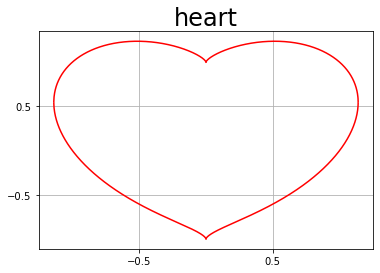

In [21]:
plt.title('heart', fontsize=24)
x = np.arange(-10, 10, 0.001)
#y = np.arange(100, -100, 0.0001)
# Разделим функцию на две части
m = np.sqrt(np.power(-1*x, 4/3) - (4*np.square(-1*x)) + 4)
k = np.sqrt(np.power(x, 4/3) - (4*np.square(x)) + 4)
#np.sqrt(1-(3/4*np.square(x)))
y1 = 0.5*(np.power(np.abs(x), 2/3) + m)
y2 = 0.5*(np.power(np.abs(x), 2/3) - m)
y3 = 0.5*(np.power(np.abs(x), 2/3) + k)
y4 = 0.5*(np.power(np.abs(x), 2/3) - k)
# Установить масштаб и интервал координат по оси x и оси y
# Это не будет выглядеть хорошо, если вы не установите его самостоятельно
my_x_ticks = np.arange(-0.5, 1.5)
my_y_ticks = np.arange(-0.5, 1.5)
plt.plot(x, y1, color='r')
plt.plot(x, y2, color='r')
plt.plot(x, y3, color='r')
plt.plot(x, y4, color='r')
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.grid()
plt.show()

In [28]:
X = sps.rayleigh
params = ()
sample = X.rvs(size = 1000)

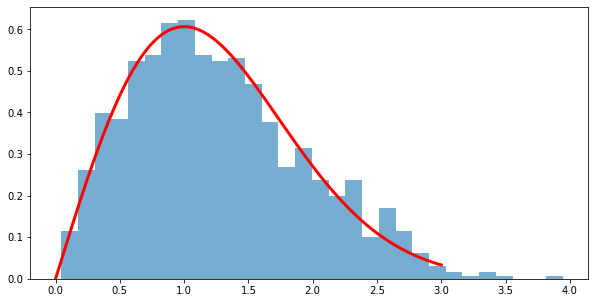

In [43]:
grid = np.linspace(0, 3, 1000)
plt.figure(figsize=(10, 5))
plt.hist(sample, bins=30, density=True, 
         alpha=0.6, label='Гистограмма выбрки (Распределение Рэлея)')
plt.plot(grid, X.pdf(grid), color='r', lw=3, label='Плотность случайной величины')
plt.title(r'Случайная величина ')